##7.Data Loading, Storage and File Formats
Problem Statement: Analyzing Sales Data from Multiple File Formats
Dataset: Sales data in multiple file formats (e.g., CSV, Excel, JSON)
Description: The goal is to load and analyze sales data from different file formats, including
CSV, Excel, and JSON, and perform data cleaning, transformation, and analysis on the
dataset.
Tasks to Perform:
Obtain sales data files in various formats, such as CSV, Excel, and JSON.
1. Load the sales data from each file format into the appropriate data structures or
dataframes.
2. Explore the structure and content of the loaded data, identifying any inconsistencies,
missing values, or data quality issues.
3. Perform data cleaning operations, such as handling missing values, removing
duplicates, or correcting inconsistencies.
4. Convert the data into a unified format, such as a common dataframe or data structure,
to enable seamless analysis.
5. Perform data transformation tasks, such as merging multiple datasets, splitting
columns, or deriving new variables.
6. Analyze the sales data by performing descriptive statistics, aggregating data by
specific variables, or calculating metrics such as total sales, average order value, or
product category distribution.
7. Create visualizations, such as bar plots, pie charts, or box plots, to represent the sales
data and gain insights into sales trends, customer behavior, or product performance.

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Step 2: Load the sales data from various formats

# Load CSV file
csv_data = pd.read_csv('7_Sales_data_csv.csv', encoding="cp1252")
print("CSV Data:")
print(csv_data.head())

CSV Data:
   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye    

In [ ]:
# Load Excel file (assuming the data is in the first sheet)
excel_data = pd.read_excel('7_Sales-data_excel.xlsx')
print("\nExcel Data:")
print(excel_data.head())


Excel Data:
   Postcode  Sales_Rep_ID Sales_Rep_Name  Year         Value
0      2121           456           Jane  2011  84219.497311
1      2092           789         Ashish  2012  28322.192268
2      2128           456           Jane  2013  81878.997241
3      2073           123           John  2011  44491.142121
4      2134           789         Ashish  2012  71837.720959


In [ ]:
# Load JSON file
json_data = pd.read_json('7_Customers_json.json')
print("\nJSON Data:")
print(json_data.head())


JSON Data:
   id                   email    first     last  \
0   1  isidro_von@hotmail.com   Torrey     Veum   
1   2  frederique19@gmail.com    Micah  Sanford   
2   3       fredy54@gmail.com   Hollis    Swift   
3   4   braxton29@hotmail.com    Perry  Leffler   
4   5      turner59@gmail.com  Janelle  Hagenes   

                          company                       created_at  \
0          Hilll, Mayert and Wolf 2014-12-25 04:06:27.981000+00:00   
1                  Stokes-Reichel 2014-07-03 16:08:17.044000+00:00   
2  Rodriguez, Cartwright and Kuhn 2014-08-18 06:15:16.731000+00:00   
3        Sipes, Feeney and Hansen 2014-07-10 11:31:40.235000+00:00   
4             Lesch and Daughters 2014-04-21 15:05:43.229000+00:00   

                                 country  
0                            Switzerland  
1  Democratic People's Republic of Korea  
2                                Tunisia  
3                                   Chad  
4                              Swaziland  


In [ ]:
# Step 3: Explore the structure of the loaded data and check for inconsistencies
print("\nChecking for missing values:")
print("CSV missing values:\n", csv_data.isnull().sum())
print("\nExcel missing values:\n", excel_data.isnull().sum())
print("\nJSON missing values:\n", json_data.isnull().sum())


Checking for missing values:
CSV missing values:
 ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

Excel missing values:
 Postcode          0
Sales_Rep_ID      0
Sales_Rep_Name    0
Year              0
Value             0
dtype: int64

JSON missing values:
 id            0
email         0
first         0
last          0
company       0
created_at    0
country       0
dtype: int64


In [ ]:
# Step 3: Perform data cleaning (e.g., handling missing values and removing duplicates)

# Filling missing values with 0 (this is a simple strategy, you can use more advanced techniques)
#csv_data.fillna(0, inplace=True)
#excel_data.fillna(0, inplace=True)
#json_data.fillna(0, inplace=True)

for column in csv_data.select_dtypes(include=np.number).columns:
    csv_data[column].fillna(csv_data[column].median(), inplace=True)

# Remove duplicates
csv_data.drop_duplicates(inplace=True)
excel_data.drop_duplicates(inplace=True)
json_data.drop_duplicates(inplace=True)

<ipython-input-8-b752c492d091>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  csv_data[column].fillna(csv_data[column].median(), inplace=True)


In [ ]:
print("\nChecking for missing values:")
print("CSV missing values:\n", csv_data.isnull().sum())
print("\nExcel missing values:\n", excel_data.isnull().sum())
print("\nJSON missing values:\n", json_data.isnull().sum())


Checking for missing values:
CSV missing values:
 ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

Excel missing values:
 Postcode          0
Sales_Rep_ID      0
Sales_Rep_Name    0
Year              0
Value             0
dtype: int64

JSON missing values:
 id            0
email         0
first         0
last          0
company       0
created_at    0
country       0
dtype: int64


In [ ]:
# Step 4: Convert data into a unified format (a common dataframe)

# For simplicity, let's assume the structures of all data are similar
# We'll concatenate the datasets into a single dataframe
# Add a source column to know which file the data came from
csv_data['source'] = 'csv'
excel_data['source'] = 'excel'
json_data['source'] = 'json'

# Concatenate all datasets into one unified dataframe
all_data = pd.concat([csv_data, excel_data, json_data], ignore_index=True)

print("\nUnified Data (first 10 rows):")
print(all_data.head(10))


Unified Data (first 10 rows):
   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0      10107.0             30.0      95.70              2.0  2871.00   
1      10121.0             34.0      81.35              5.0  2765.90   
2      10134.0             41.0      94.74              2.0  3884.34   
3      10145.0             45.0      83.26              6.0  3746.70   
4      10159.0             49.0     100.00             14.0  5205.27   
5      10168.0             36.0      96.66              1.0  3479.76   
6      10180.0             29.0      86.13              9.0  2497.77   
7      10188.0             48.0     100.00              1.0  5512.32   
8      10201.0             22.0      98.57              2.0  2168.54   
9      10211.0             41.0     100.00             14.0  4708.44   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ... Sales_Rep_Name  \
0   2/24/2003 0:00  Shipped     1.0       2.0   2003.0  ...            NaN   
1    5/7/2003 0:00  

In [ ]:
all_data.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE', 'source', 'Postcode', 'Sales_Rep_ID', 'Sales_Rep_Name',
       'Year', 'Value', 'id', 'email', 'first', 'last', 'company',
       'created_at', 'country'],
      dtype='object')

In [ ]:
# Step 5: Perform data transformations
# Example: Splitting a 'Product' column into 'Category' and 'Subcategory' if needed
# Here, let's assume we have a column 'Product' that we want to split
# (You can adjust based on the actual data structure)

# Standardize column names (e.g., make all lowercase)
all_data.columns = all_data.columns.str.lower()

# Derive a new variable: total sales by multiplying 'quantityordered' and 'priceeach'
all_data['total_sales'] = all_data['quantityordered'] * all_data['priceeach']

# Assuming the 'Product' column has "Category-Subcategory" format, split the columns
#if 'Product' in all_data.columns:
    #all_data[['Category', 'Subcategory']] = all_data['Product'].str.split('-', expand=True)

In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13212 entries, 0 to 13211
Data columns (total 39 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   ordernumber       2823 non-null   float64            
 1   quantityordered   2823 non-null   float64            
 2   priceeach         2823 non-null   float64            
 3   orderlinenumber   2823 non-null   float64            
 4   sales             2823 non-null   float64            
 5   orderdate         2823 non-null   object             
 6   status            2823 non-null   object             
 7   qtr_id            2823 non-null   float64            
 8   month_id          2823 non-null   float64            
 9   year_id           2823 non-null   float64            
 10  productline       2823 non-null   object             
 11  msrp              2823 non-null   float64            
 12  productcode       2823 non-null   object             
 13  c

In [ ]:
# Step 6: Analyze the sales data
# Example: Calculate total sales and average order value by product category

# Calculate total sales
total_sales = all_data['total_sales'].sum()
print("Total Sales:", total_sales)

# Calculate average order value
average_order_value = all_data['total_sales'].mean()
print("Average Order Value:", average_order_value)

# Aggregate sales by product line
sales_by_productline = all_data.groupby('productline')['total_sales'].sum()
print("\nSales by Product Line:\n", sales_by_productline)


Total Sales: 8290886.789999999
Average Order Value: 2936.9064080765143

Sales by Product Line:
 productline
Classic Cars        2968546.40
Motorcycles          971086.29
Planes               877942.21
Ships                677940.40
Trains               203804.26
Trucks and Buses     947355.18
Vintage Cars        1644212.05
Name: total_sales, dtype: float64


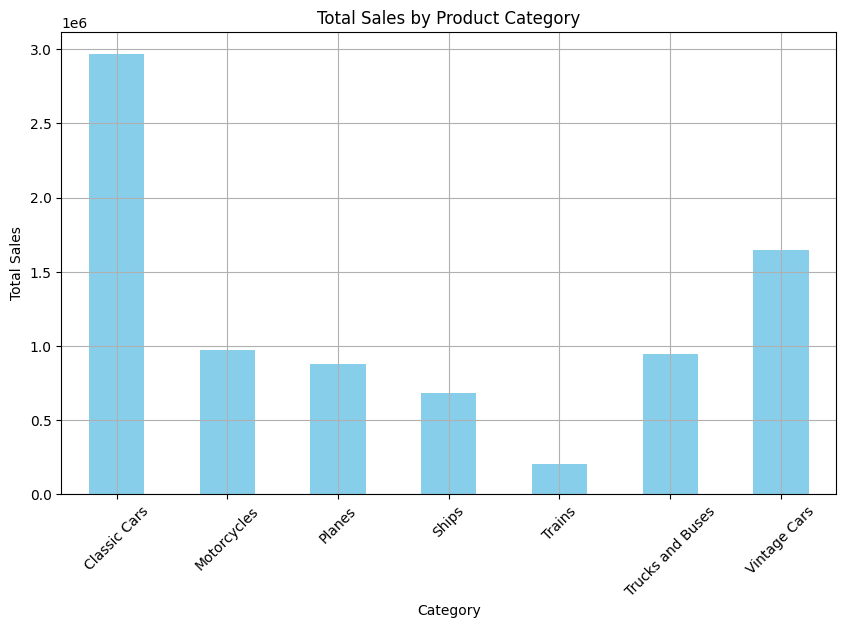

In [ ]:
plt.figure(figsize=(10, 6))
sales_by_productline.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

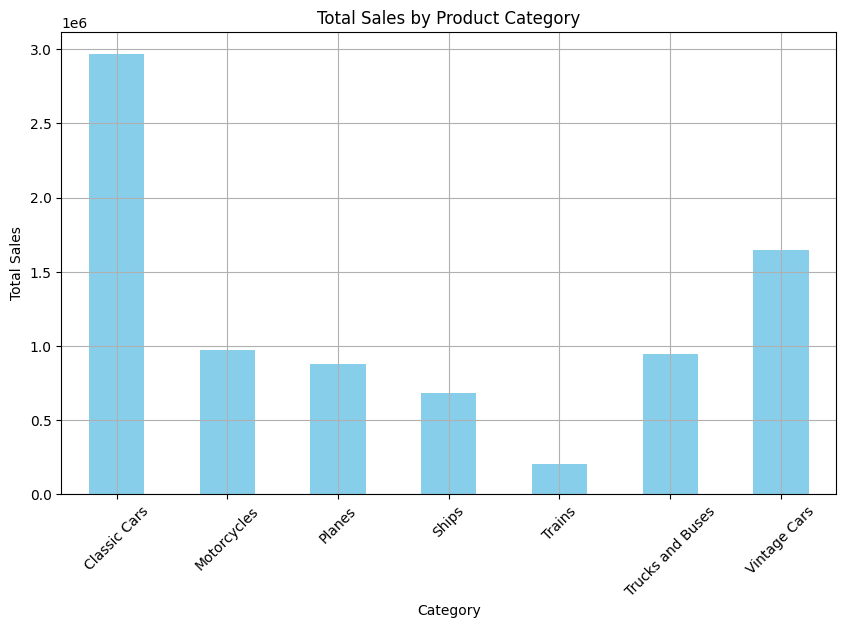

In [ ]:
# Step 8: Create visualizations

# Bar plot of total sales by category
plt.figure(figsize=(10, 6))
sales_by_productline.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

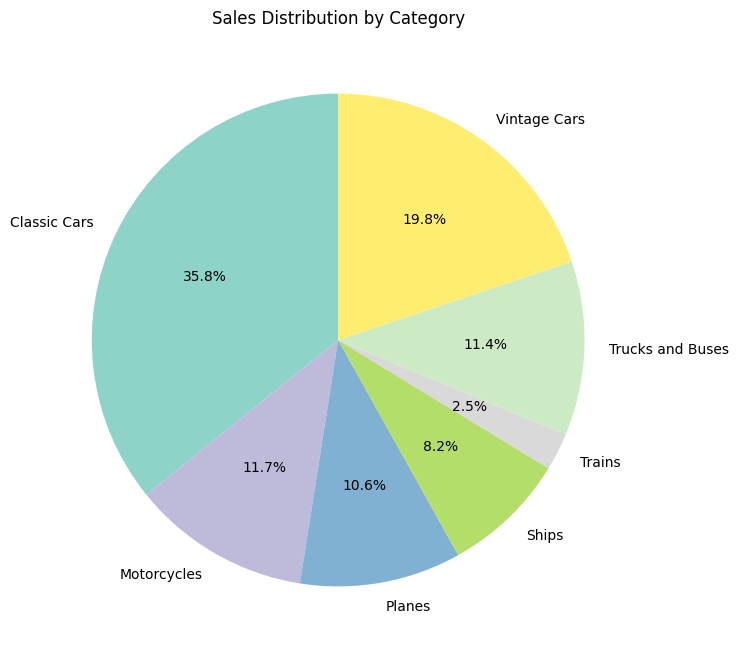

In [ ]:
# Pie chart of sales distribution across categories
plt.figure(figsize=(8, 8))
sales_by_productline.plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='Set3')
plt.title('Sales Distribution by Category')
plt.ylabel('')  # Hide the y-label
plt.show()

<Figure size 800x600 with 0 Axes>

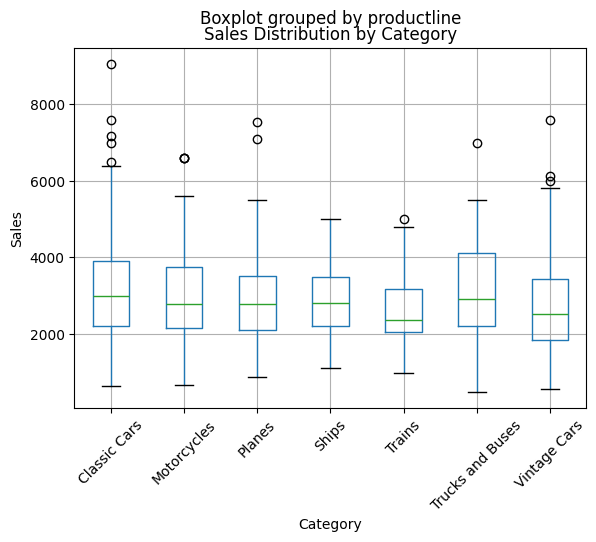

In [ ]:
# Box plot of sales to identify the spread and potential outliers
plt.figure(figsize=(8, 6))
all_data.boxplot(column='total_sales', by='productline', grid=True)
plt.title('Sales Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Step 9: Export the unified, cleaned dataset for future use
all_data.to_csv('Unified_Sales_Data.csv', index=False)
print("\nUnified and cleaned data exported to 'Unified_Sales_Data.csv'.")

##8.Interacting with Web APIs
Problem Statement: Analyzing Weather Data from OpenWeatherMap API
Dataset: Weather data retrieved from OpenWeatherMap API
Description: The goal is to interact with the OpenWeatherMap API to retrieve weather data
for a specific location and perform data modeling and visualization to analyze weather
patterns over time.
Tasks to Perform:
1. Register and obtain API key from OpenWeatherMap.
2. **Interact** with the OpenWeatherMap API using the API key to retrieve weather data for
a specific location.
3. Extract relevant weather attributes such as temperature, humidity, wind speed, and
precipitation from the API response.
4. Clean and preprocess the retrieved data, handling missing values or inconsistent
formats.
5. Perform data modeling to analyze weather patterns, such as calculating average
temperature, maximum/minimum values, or trends over time.
6. Visualize the weather data using appropriate plots, such as line charts, bar plots, or
scatter plots, to represent temperature changes, precipitation levels, or wind speed
variations.
7. Apply data aggregation techniques to summarize weather statistics by specific time
periods (e.g., daily, monthly, seasonal).
8. Incorporate geographical information, if available, to create maps or geospatial
visualizations representing weather patterns across different locations.
9. Explore and visualize relationships between weather attributes, such as temperature
and humidity, using correlation plots or heatmaps.

In [14]:
# Step 1: Import necessary libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [8]:
# Step 2: Set up the API key and endpoint for OpenWeatherMap
API_KEY = "1291a2d59057b874e2d705f2462153f2"  # Replace with your actual API key
city = "Pune"
url = f"https://api.openweathermap.org/data/2.5/forecast?q={city}&appid={API_KEY}"

In [10]:
# Step 3: Make a request to OpenWeatherMap API and get weather data
response = requests.get(url)
if response.status_code == 200:
    print("Data retrieval successful!")
    data = response.json()
else:
    print(f"Failed to retrieve data: {response.status_code}")

Data retrieval successful!


In [11]:
print(data)

{'cod': '200', 'message': 0, 'cnt': 40, 'list': [{'dt': 1731218400, 'main': {'temp': 298.42, 'feels_like': 298.26, 'temp_min': 298.42, 'temp_max': 301.31, 'pressure': 1016, 'sea_level': 1016, 'grnd_level': 942, 'humidity': 48, 'temp_kf': -2.89}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'clouds': {'all': 1}, 'wind': {'speed': 2.7, 'deg': 99, 'gust': 2.7}, 'visibility': 10000, 'pop': 0, 'sys': {'pod': 'd'}, 'dt_txt': '2024-11-10 06:00:00'}, {'dt': 1731229200, 'main': {'temp': 300.9, 'feels_like': 300.6, 'temp_min': 300.9, 'temp_max': 302.86, 'pressure': 1013, 'sea_level': 1013, 'grnd_level': 939, 'humidity': 40, 'temp_kf': -1.96}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'clouds': {'all': 0}, 'wind': {'speed': 1.25, 'deg': 51, 'gust': 1.75}, 'visibility': 10000, 'pop': 0, 'sys': {'pod': 'd'}, 'dt_txt': '2024-11-10 09:00:00'}, {'dt': 1731240000, 'main': {'temp': 301.18, 'feels_like': 300.84, 'temp_mi

In [15]:
# Step 4: Extract relevant weather attributes (temperature, humidity, wind speed)
# We will parse the 'list' section of the API response that contains the forecast
weather_data = []
for data in data['list']:
    weather_data.append({
        "date": dt.datetime.fromtimestamp(data['dt']),           # Convert timestamp to date
        "temperature": data['main']['temp'],                     # Current temperature
        "humidity": data['main']['humidity'],                    # Humidity
        "wind_speed": data['wind']['speed'],                     # Wind speed
        "precipitation": data.get('rain', {}).get('1h', 0)       # Precipitation (if available)
    })

In [16]:
# Step 5: Convert the extracted data into a pandas DataFrame
df = pd.DataFrame(weather_data)
print("\nFirst few rows of the weather data:")
print(df.head())


First few rows of the weather data:
                 date  temperature  humidity  wind_speed  precipitation
0 2024-11-10 06:00:00       298.42        48        2.70              0
1 2024-11-10 09:00:00       300.90        40        1.25              0
2 2024-11-10 12:00:00       301.18        40        1.63              0
3 2024-11-10 15:00:00       297.26        47        1.60              0
4 2024-11-10 18:00:00       295.52        54        1.12              0


In [17]:
# Step 6: Clean and preprocess the data (handling missing values if any)
df.fillna(0, inplace=True)  # Fill any missing values with 0
print("\nCleaned data:")
print(df.info())


Cleaned data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           40 non-null     datetime64[ns]
 1   temperature    40 non-null     float64       
 2   humidity       40 non-null     int64         
 3   wind_speed     40 non-null     float64       
 4   precipitation  40 non-null     int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 1.7 KB
None


In [18]:
# Step 7: Perform data modeling: Calculate daily average temperature
df['date_only'] = df['date'].dt.date
daily_avg_temp = df.groupby('date_only')['temperature'].mean()

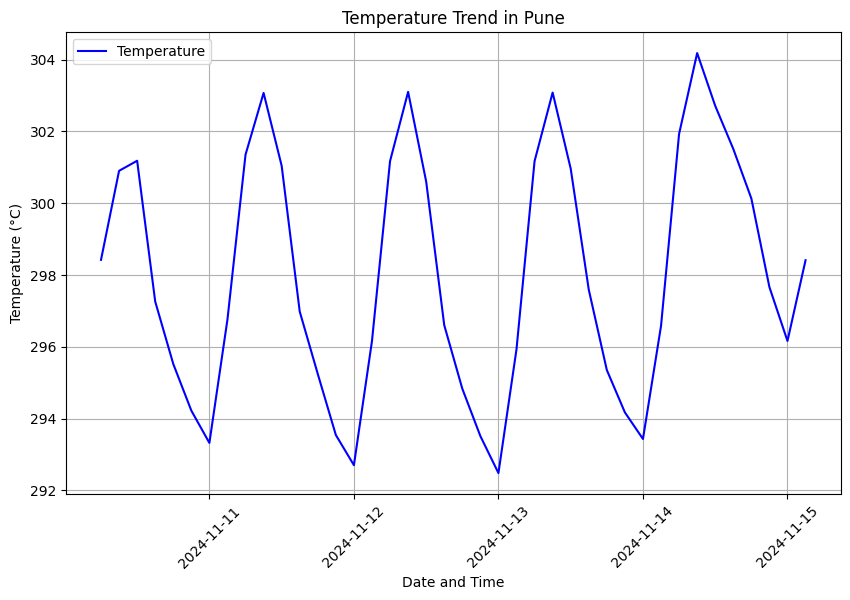

In [19]:
# Step 8: Visualize the weather data (temperature trends)
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['temperature'], color='blue', label='Temperature')
plt.title(f'Temperature Trend in {city}')
plt.xlabel('Date and Time')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

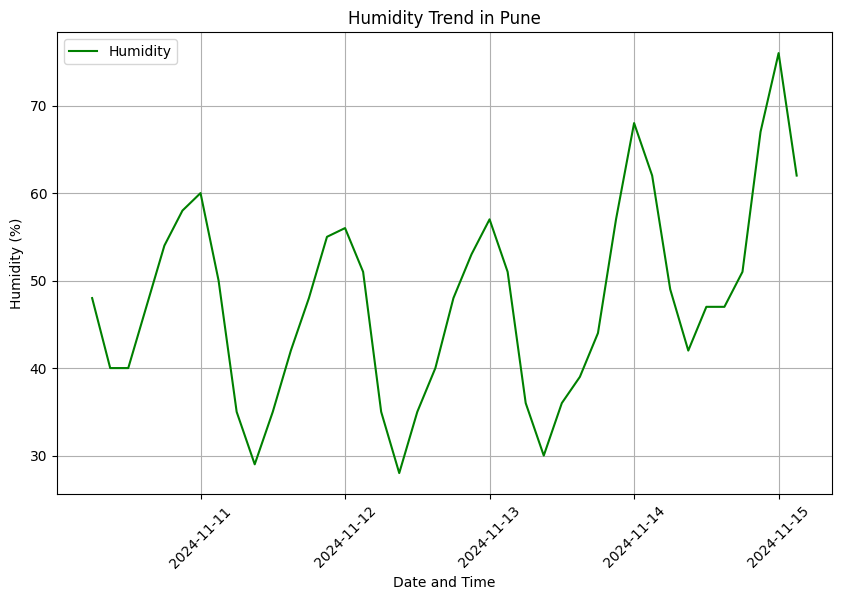

In [20]:
# Step 9: Visualize humidity levels over time
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['humidity'], color='green', label='Humidity')
plt.title(f'Humidity Trend in {city}')
plt.xlabel('Date and Time')
plt.ylabel('Humidity (%)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

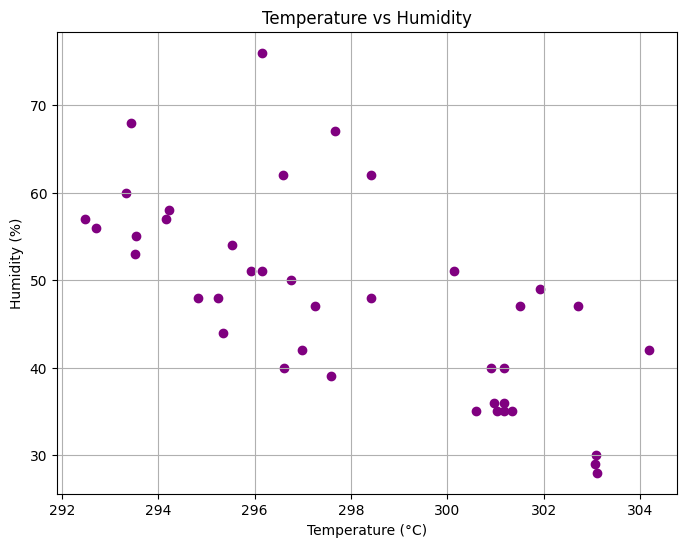

In [21]:
# Step 10: Scatter plot for correlation between temperature and humidity
plt.figure(figsize=(8, 6))
plt.scatter(df['temperature'], df['humidity'], color='purple')
plt.title('Temperature vs Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.show()

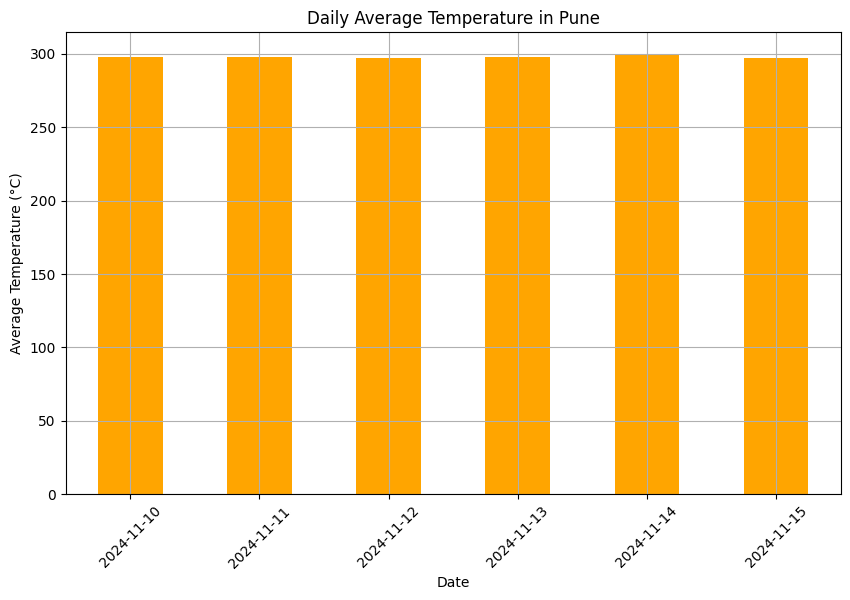

In [22]:
# Step 11: Data Aggregation - Average daily temperature
plt.figure(figsize=(10, 6))
daily_avg_temp.plot(kind='bar', color='orange')
plt.title(f'Daily Average Temperature in {city}')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [23]:
# Step 12: Export the cleaned data for future use
df.to_csv('Cleaned_Weather_Data.csv', index=False)
print("Cleaned weather data exported to 'Cleaned_Weather_Data.csv'.")

Cleaned weather data exported to 'Cleaned_Weather_Data.csv'.


##9.Data Cleaning and Preparation
Analyzing Customer Churn in a Telecommunications Company

Dataset: "Telecom_Customer_Churn.csv" Description: The dataset contains information about
customers of a telecommunications company and whether they have churned (i.e.,
discontinued their services). The dataset includes various attributes of the customers, such as
their demographics, usage patterns, and account information. The goal is to perform data
cleaning and preparation to gain insights into the factors that contribute to customer churn.

Tasks to Perform:

*1. Import the "Telecom_Customer_Churn.csv" dataset.

*2. Explore the dataset to understand its structure and content.

*3. Handle missing values in the dataset, deciding on an appropriate strategy.

*4. Remove any duplicate records from the dataset.

*5. Check for inconsistent data, such as inconsistent formatting or spelling variations, and standardize it.

*6. Convert columns to the correct data types as needed.

*7. Identify and handle outliers in the data.

*8. Perform feature engineering, creating new features that may be relevant to predicting
customer churn.

*9. Normalize or scale the data if necessary.

*10. Split the dataset into training and testing sets for further analysis.

*11. Export the cleaned dataset for future analysis or modeling

In [ ]:
!pip install pandas matplotlib openpyxl

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Task 1: Import the dataset
df = pd.read_csv('telecom_customer_churn.csv')

In [ ]:
# Task 2: Explore the dataset to understand its structure and content
print("Dataset Info:")
print(df.info())
print("\nFirst few rows of the dataset:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 no

In [ ]:
# Task 3: Handle missing values
# Checking for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Customer ID                          0
Gender                               0
Age                                  0
Married                              0
Number of Dependents                 0
City                                 0
Zip Code                             0
Latitude                             0
Longitude                            0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                 

In [ ]:
# Strategy: Fill numerical columns with the median, and categorical columns with the mode
for column in df.select_dtypes(include=np.number).columns:
    df[column].fillna(df[column].median(), inplace=True)

for column in df.select_dtypes(include='object').columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

<ipython-input-32-339e39609b44>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
<ipython-input-32-339e39609b44>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [ ]:
# Task 4: Remove duplicate records
df.drop_duplicates(inplace=True)

In [ ]:
# Task 5: Check for inconsistent data and standardize it
# For simplicity, let's standardize categorical columns like 'gender', 'Yes', 'No' etc.
df['Gender'] = df['Gender'].str.strip().str.lower().replace({'male': 'Male', 'female': 'Female'})
df['Married'] = df['Married'].replace({'Yes': 1, 'No': 0})

# You can standardize other columns similarly as needed
# ...

<ipython-input-34-d1c1858d3821>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Married'] = df['Married'].replace({'Yes': 1, 'No': 0})


In [ ]:
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,1,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,Competitor,Competitor had better devices
1,0003-MKNFE,Male,46,0,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,Competitor,Competitor had better devices
2,0004-TLHLJ,Male,50,0,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,1,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,1,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [ ]:
# Task 6: Convert columns to the correct data types
# For example, converting 'TotalCharges' column to numeric if it is incorrectly formatted
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

# Again, checking for any remaining missing values after type conversion
#df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

In [ ]:
# Task 7: Identify and handle outliers
# Let's identify outliers in numerical columns using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Example: Removing outliers from 'MonthlyCharges'
df = remove_outliers(df, 'Monthly Charge')

In [ ]:
# Task 8: Perform feature engineering
# Creating a new feature 'Tenure_Group' by binning the 'tenure' column
df['Total Revenue Analysis'] = pd.cut(df['Total Revenue'], bins=[0, 500, 1000, 1500, np.inf], labels=['0-500', '500-1000', '1000-1500', '1500+'])

In [ ]:
print(df.head())

  Customer ID  Gender  Age  Married  Number of Dependents          City  \
0  0002-ORFBO  Female   37        1                     0  Frazier Park   
1  0003-MKNFE    Male   46        0                     0      Glendale   
2  0004-TLHLJ    Male   50        0                     0    Costa Mesa   
3  0011-IGKFF    Male   78        1                     0      Martinez   
4  0013-EXCHZ  Female   75        1                     0     Camarillo   

   Zip Code   Latitude   Longitude  Number of Referrals  ...  Monthly Charge  \
0     93225  34.827662 -118.999073                    2  ...            65.6   
1     91206  34.162515 -118.203869                    0  ...            -4.0   
2     92627  33.645672 -117.922613                    0  ...            73.9   
3     94553  38.014457 -122.115432                    1  ...            98.0   
4     93010  34.227846 -119.079903                    3  ...            83.9   

  Total Charges Total Refunds  Total Extra Data Charges  \
0        

In [ ]:
# Task 9: Normalize or scale the data
# We can normalize continuous features like 'MonthlyCharges' and 'TotalCharges'
scaler = StandardScaler()
df['Monthly Charge'] = scaler.fit_transform(df[['Monthly Charge']])

In [ ]:
# Task 10: Split the dataset into training and testing sets
X = df.drop(columns=['Customer Status'])  # Features
y = df['Customer Status']  # Target variable

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Task 11: Save the cleaned and processed dataset
df.to_csv('cleaned_telecom_customer_churn.csv', index=False)

print("\nData Cleaning Completed. Cleaned dataset saved as 'cleaned_telecom_customer_churn.csv'")


Data Cleaning Completed. Cleaned dataset saved as 'cleaned_telecom_customer_churn.csv'


##11.Data Wrangling
Problem Statement: Data Wrangling on Real Estate Market
Dataset: "RealEstate_Prices.csv"
Description: The dataset contains information about housing prices in a specific real estate
market. It includes various attributes such as property characteristics, location, sale prices,
and other relevant features. The goal is to perform data wrangling to gain insights into the
factors influencing housing prices and prepare the dataset for further analysis or modeling.
Tasks to Perform:

*1. Import the "RealEstate_Prices.csv" dataset. Clean column names by removing spaces,
special characters, or renaming them for clarity.

*2. Handle missing values in the dataset, deciding on an appropriate strategy (e.g.,
imputation or removal).

*3. Perform data merging if additional datasets with relevant information are available
(e.g., neighborhood demographics or nearby amenities).

*4. Filter and subset the data based on specific criteria, such as a particular time period,
property type, or location.

*5. Handle categorical variables by encoding them appropriately (e.g., one-hot encoding
or label encoding) for further analysis.

*6. Aggregate the data to calculate summary statistics or derived metrics such as average
sale prices by neighborhood or property type.

*7. Identify and handle outliers or extreme values in the data that may affect the analysis
or modeling process.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Task 1: Import dataset and clean column names
df = pd.read_csv('Bengaluru_House_Data.csv')

In [ ]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
# Clean column names by removing spaces and special characters
df.columns = df.columns.str.replace(' ', '_').str.replace('[^A-Za-z0-9_]+', '')

In [ ]:
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
              area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00  


In [ ]:
# Task 2: Handle missing values
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64


In [ ]:
# Example strategy: Fill missing numerical values with the mean
df['location'].fillna(df['location'].mode()[0], inplace=True)
df['size'].fillna(df['size'].mode()[0], inplace=True)
df['society'].fillna(df['society'].mode()[0], inplace=True)
df['bath'].fillna(df['bath'].mode()[0], inplace=True)
df['balcony'].fillna(df['balcony'].mode()[0], inplace=True)

# Alternatively, fill categorical missing values with the mode
#df.fillna(df.mode().iloc[0], inplace=True)

<ipython-input-29-a880a7b986ed>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bath'].fillna(df['bath'].mode()[0], inplace=True)
<ipython-input-29-a880a7b986ed>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [ ]:
print(df.isnull().sum())

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64


In [ ]:
# Task 3: Perform data merging (if additional datasets are available)
# Assuming we have a neighborhood dataset 'neighborhood_data.csv'
neighborhood_df = pd.read_csv('Neighborhood.csv')
# Merging based on a common column, for example, 'Neighborhood'
df = pd.merge(df, neighborhood_df, on='location', how='left')

In [ ]:
# Task 4: Filter and subset data based on specific criteria
# Example: Filter properties sold in a specific year (e.g., 2020) and in a specific location
filtered_df = df[(df['size'] == '2 BHK') & (df['location'] == 'Kothanur')]

In [ ]:
print("\nFiltered data:")
print(filtered_df.head())


Filtered data:
                 area_type   availability  location   size  society  \
4     Super built-up  Area  Ready To Move  Kothanur  2 BHK  GrrvaGr   
196   Super built-up  Area  Ready To Move  Kothanur  2 BHK  GrrvaGr   
2472  Super built-up  Area  Ready To Move  Kothanur  2 BHK  GrrvaGr   
3876  Super built-up  Area  Ready To Move  Kothanur  2 BHK  GrrvaGr   
4978  Super built-up  Area  Ready To Move  Kothanur  2 BHK  GrrvaGr   

     total_sqft  bath  balcony  price  
4          1200   2.0      1.0   51.0  
196        1186   2.0      2.0   58.0  
2472       1187   2.0      2.0   58.0  
3876       1185   2.0      2.0   59.0  
4978       1070   2.0      1.0   45.5  


In [ ]:
# Task 5: Handle categorical variables by encoding
# Using one-hot encoding for a categorical column, e.g., 'Property_Type'
df_encoded = pd.get_dummies(df, columns=['area_type'], drop_first=True)

print("\nData after encoding categorical variables:")
print(df_encoded.head())


Data after encoding categorical variables:
    availability                  location       size  society total_sqft  \
0         19-Dec  Electronic City Phase II      2 BHK  Coomee        1056   
1  Ready To Move          Chikka Tirupathi  4 Bedroom  Theanmp       2600   
2  Ready To Move               Uttarahalli      3 BHK  GrrvaGr       1440   
3  Ready To Move        Lingadheeranahalli      3 BHK  Soiewre       1521   
4  Ready To Move                  Kothanur      2 BHK  GrrvaGr       1200   

   bath  balcony   price  area_type_Carpet  Area  area_type_Plot  Area  \
0   2.0      1.0   39.07                   False                 False   
1   5.0      3.0  120.00                   False                  True   
2   2.0      3.0   62.00                   False                 False   
3   3.0      1.0   95.00                   False                 False   
4   2.0      1.0   51.00                   False                 False   

   area_type_Super built-up  Area  
0           

In [ ]:
# Task 6: Aggregate data to calculate summary statistics
# Example: Calculate average sale price by neighborhood
avg_price_by_neighborhood = df.groupby('location')['price'].mean()

print("\nAverage Sale Price by Neighborhood:")
print(avg_price_by_neighborhood)

KeyError: 'Neighborhood'

In [ ]:
# Task 7: Identify and handle outliers
# Example: Remove outliers based on Sale Price (values more than 3 standard deviations from the mean)
mean_price = df['price'].mean()
std_price = df['price'].std()

df_no_outliers = df[(df['price'] > (mean_price - 3 * std_price)) & (df['price'] < (mean_price + 3 * std_price))]

print("\nData after removing outliers:")
print(df_no_outliers.head())


Data after removing outliers:
              area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2  GrrvaGr       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4  GrrvaGr       1200   2.0      1.0   51.00  


In [ ]:
# Save the cleaned and processed dataset
df_no_outliers.to_csv('Cleaned_RealEstate_Prices.csv', index=False)

print("\nData Wrangling Completed. Cleaned dataset saved as 'Cleaned_RealEstate_Prices.csv'")


Data Wrangling Completed. Cleaned dataset saved as 'Cleaned_RealEstate_Prices.csv'


###12.Data Visualization using matplotlib
Problem Statement: Analyzing Air Quality Index (AQI) Trends in a City
Dataset: "City_Air_Quality.csv"
Description: The dataset contains information about air quality measurements in a specific
city over a period of time. It includes attributes such as date, time, pollutant levels (e.g.,
PM2.5, PM10, CO), and the Air Quality Index (AQI) values. The goal is to use the matplotlib
library to create visualizations that effectively represent the AQI trends and patterns for
different pollutants in the city.
Tasks to Perform:

*1. Import the "City_Air_Quality.csv" dataset.

*2. Explore the dataset to understand its structure and content.

*3. Identify the relevant variables for visualizing AQI trends, such as date, pollutant
levels, and AQI values.

*4. Create line plots or time series plots to visualize the overall AQI trend over time.

*5. Plot individual pollutant levels (e.g., PM2.5, PM10, CO) on separate line plots to
visualize their trends over time.

*6. Use bar plots or stacked bar plots to compare the AQI values across different dates or
time periods.

*7. Create box plots or violin plots to analyze the distribution of AQI values for different
pollutant categories.

*8. Use scatter plots or bubble charts to explore the relationship between AQI values and
pollutant levels.

*9. Customize the visualizations by adding labels, titles, legends, and appropriate color
schemes.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Task 1: Import the dataset
df = pd.read_csv('12_City_Air_Quality.csv')

In [ ]:
# Task 2: Explore the dataset structure
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB
None


In [ ]:
print("\nFirst few rows of the dataset:")
df.head()


First few rows of the dataset:


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
df.isnull().sum()

,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


In [ ]:
for column in df.select_dtypes(include=np.number).columns:
  df[column].fillna(df[column].median(), inplace=True)

for column in df.select_dtypes(include='object').columns:
  df[column].fillna(df[column].mode()[0], inplace=True)

<ipython-input-17-9732d43e1ab5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
<ipython-input-17-9732d43e1ab5>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [ ]:
df.isnull().sum()

,0
City,0
Date,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0


In [ ]:
# Task 3: Identify relevant variables
# We assume columns like 'Date', 'PM2.5', 'PM10', 'CO', and 'AQI' are present in the dataset.
# Convert 'Date' column to datetime if necessary
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df['AQI'] = pd.to_numeric(df['AQI'])

In [ ]:
df.dtypes

,0
City,object
Date,datetime64[ns]
PM2.5,float64
PM10,float64
NO,float64
NO2,float64
NOx,float64
NH3,float64
CO,float64
SO2,float64


In [ ]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,133.36,0.00,0.02,0.00,118.0,Moderate
1,Ahmedabad,2015-01-02,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,5.50,3.77,118.0,Moderate
2,Ahmedabad,2015-01-03,48.57,95.68,17.40,19.30,29.70,15.85,17.40,29.07,30.70,6.80,16.40,2.25,118.0,Moderate
3,Ahmedabad,2015-01-04,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,36.08,4.43,10.14,1.00,118.0,Moderate
4,Ahmedabad,2015-01-05,48.57,95.68,22.10,21.42,37.76,15.85,22.10,39.33,39.31,7.01,18.89,2.78,118.0,Moderate


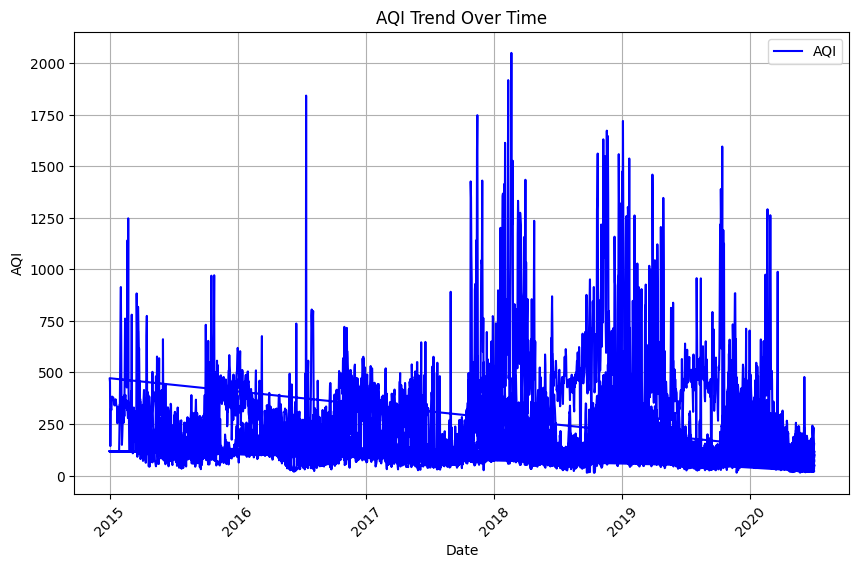

In [ ]:
# Task 4: Create line plot to visualize overall AQI trend over time
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['AQI'], color='b', label='AQI')
plt.title('AQI Trend Over Time')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

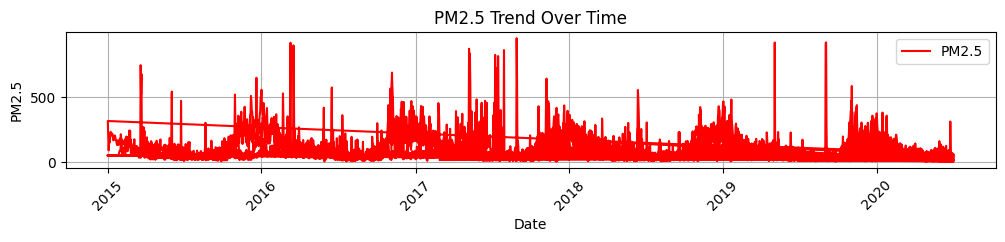

In [ ]:
# Task 5: Plot individual pollutant levels over time (PM2.5, PM10, CO)

# PM2.5 plot
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(df['Date'], df['PM2.5'], color='r', label='PM2.5')
plt.title('PM2.5 Trend Over Time')
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

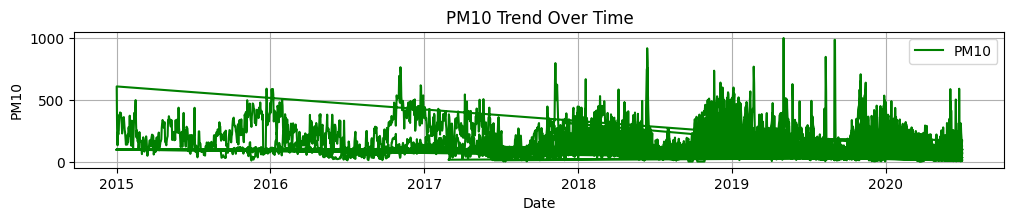

In [ ]:
# PM10 plot
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 2)
plt.plot(df['Date'], df['PM10'], color='g', label='PM10')
plt.title('PM10 Trend Over Time')
plt.xlabel('Date')
plt.ylabel('PM10')
plt.legend()
plt.grid(True)

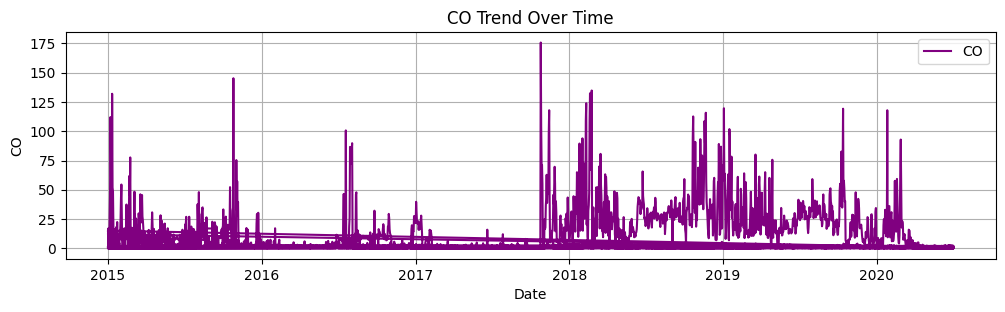

In [ ]:
# CO plot
plt.figure(figsize=(12, 10))
plt.subplot(3, 1, 3)
plt.plot(df['Date'], df['CO'], color='purple', label='CO')
plt.title('CO Trend Over Time')
plt.xlabel('Date')
plt.ylabel('CO')
plt.legend()
plt.grid(True)

In [ ]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

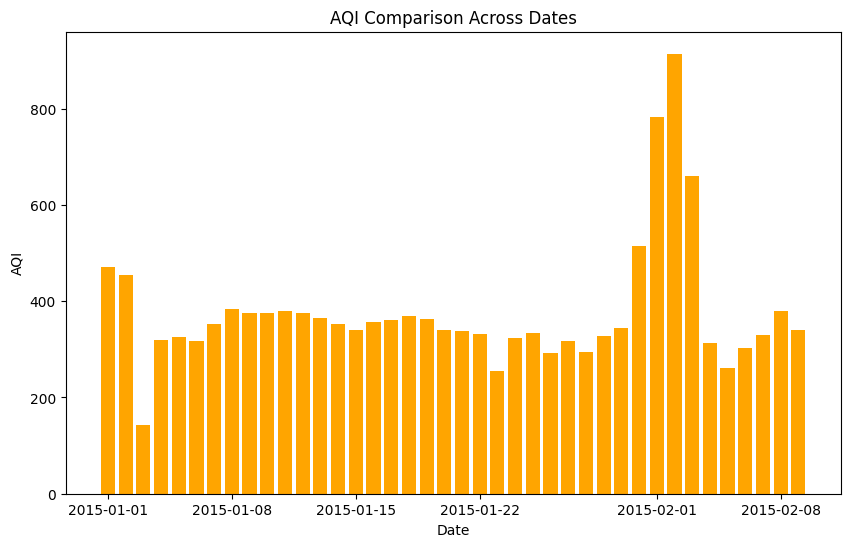

In [ ]:
# Task 6: Bar plot to compare AQI values across different dates
# Example: Using a subset of the data for specific dates
df_subset = df[df['Date'] < '2015-02-10']  # Adjust dates based on your dataset

plt.figure(figsize=(10, 6))
plt.bar(df_subset['Date'], df_subset['AQI'], color='orange')
plt.title('AQI Comparison Across Dates')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.show()

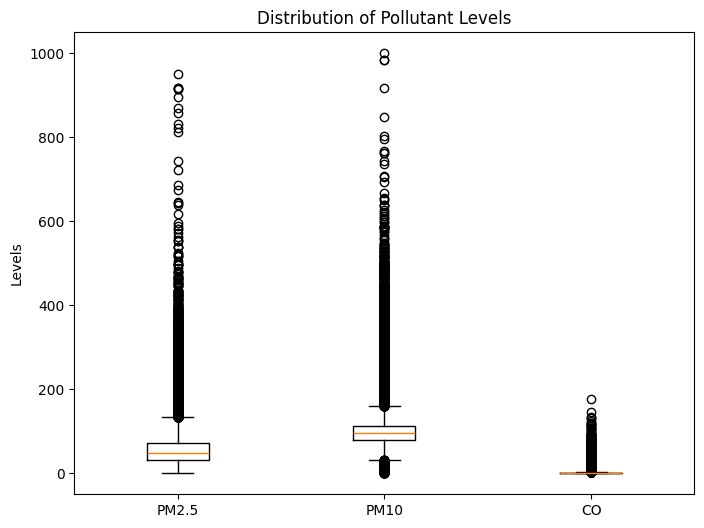

In [ ]:
# Task 7: Box plot to analyze AQI distribution for different pollutants
plt.figure(figsize=(8, 6))
plt.boxplot([df['PM2.5'], df['PM10'], df['CO']], labels=['PM2.5', 'PM10', 'CO'])
plt.title('Distribution of Pollutant Levels')
plt.ylabel('Levels')
plt.show()

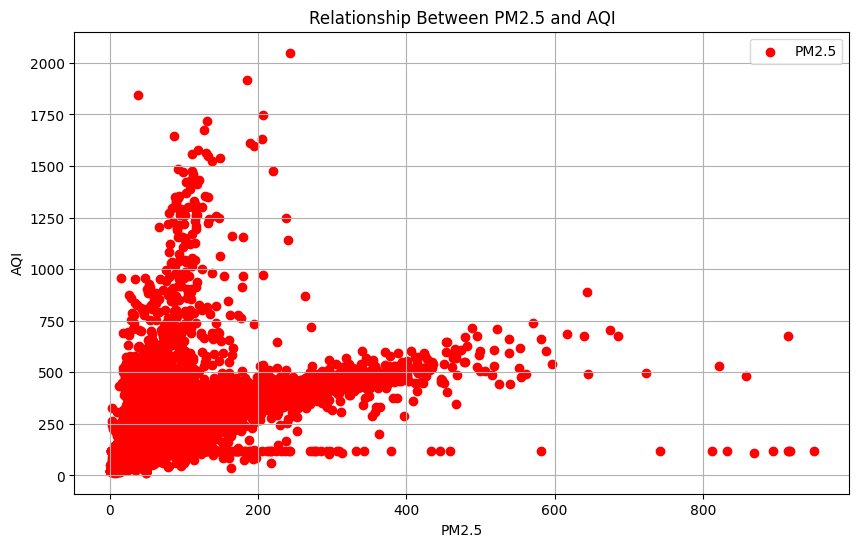

In [ ]:
# Task 8: Scatter plot to explore relationship between AQI and pollutant levels
plt.figure(figsize=(10, 6))

# Scatter plot: AQI vs PM2.5
plt.scatter(df['PM2.5'], df['AQI'], color='r', label='PM2.5')
plt.title('Relationship Between PM2.5 and AQI')
plt.xlabel('PM2.5')
plt.ylabel('AQI')
plt.grid(True)
plt.legend()
plt.show()

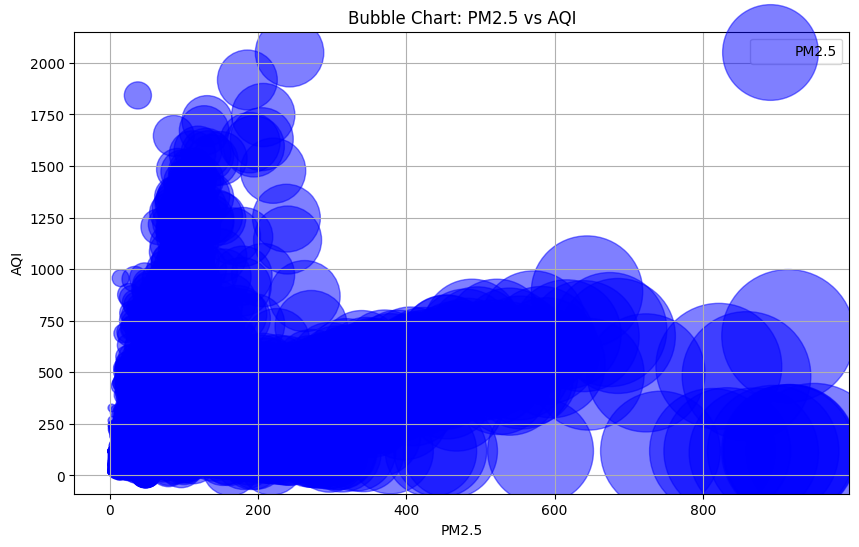

In [ ]:
# Not necessary
# Task 9: Customize visualizations with labels, titles, legends
# Example: Bubble chart with customizations
plt.figure(figsize=(10, 6))
bubble_size = df['PM2.5'] * 10  # Adjust size factor for bubbles

plt.scatter(df['PM2.5'], df['AQI'], s=bubble_size, color='b', alpha=0.5, label='PM2.5')
plt.title('Bubble Chart: PM2.5 vs AQI')
plt.xlabel('PM2.5')
plt.ylabel('AQI')
plt.legend()
plt.grid(True)
plt.show()

##13.Data Aggregation
Problem Statement: Analyzing Sales Performance by Region in a Retail Company
Dataset: "Retail_Sales_Data.csv"
Description: The dataset contains information about sales transactions in a retail company. It
includes attributes such as transaction date, product category, quantity sold, and sales
amount. The goal is to perform data aggregation to analyze the sales performance by region
and identify the top-performing regions.
Tasks to Perform:

*1. Import the "Retail_Sales_Data.csv" dataset.

*2. Explore the dataset to understand its structure and content.

*3. Identify the relevant variables for aggregating sales data, such as region, sales
amount, and product category.

*4. Group the sales data by region and calculate the total sales amount for each region.

*5. Create bar plots or pie charts to visualize the sales distribution by region.

*6. Identify the top-performing regions based on the highest sales amount.

*7. Group the sales data by region and product category to calculate the total sales
amount for each combination.

*8. Create stacked bar plots or grouped bar plots to compare the sales amounts across
different regions and product categories.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Task 1: Import the dataset
df = pd.read_csv('12_customer_shopping_data.csv')

In [ ]:
# Task 2: Explore the dataset structure
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55290 entries, 0 to 55289
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      55290 non-null  object 
 1   customer_id     55290 non-null  object 
 2   gender          55290 non-null  object 
 3   age             55290 non-null  int64  
 4   category        55289 non-null  object 
 5   quantity        55289 non-null  float64
 6   price           55289 non-null  float64
 7   payment_method  55289 non-null  object 
 8   invoice_date    55289 non-null  object 
 9   shopping_mall   55289 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 4.2+ MB
None


In [ ]:
print("\nFirst few rows of the dataset:")
print(df.head())


First few rows of the dataset:
  invoice_no customer_id  gender  age  category  quantity    price  \
0    I138884     C241288  Female   28  Clothing         5  1500.40   
1    I317333     C111565    Male   21     Shoes         3  1800.51   
2    I127801     C266599    Male   20  Clothing         1   300.08   
3    I173702     C988172  Female   66     Shoes         5  3000.85   
4    I337046     C189076  Female   53     Books         4    60.60   

  payment_method invoice_date   shopping_mall  
0    Credit Card     5/8/2022          Kanyon  
1     Debit Card   12/12/2021  Forum Istanbul  
2           Cash    9/11/2021       Metrocity  
3    Credit Card   16/05/2021    Metropol AVM  
4           Cash   24/10/2021          Kanyon  


In [ ]:
# Task 3: Identify relevant variables
# Assume relevant columns include 'Shopping Mall', 'Price Amount', 'Product_Category'
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64


In [ ]:
df['sales'] = df['quantity'] * df['price']

In [ ]:
df.columns

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall', 'sales'],
      dtype='object')

In [ ]:
# Task 4: Group sales data by region and calculate total sales for each region
sales_by_region = df.groupby('shopping_mall')['sales'].sum().reset_index()

print("\nTotal sales by region:")
print(sales_by_region)


Total sales by region:
       shopping_mall        sales
0        Cevahir AVM   7034401.09
1  Emaar Square Mall   7004074.39
2     Forum Istanbul   6713933.38
3       Istinye Park  13619165.62
4             Kanyon  28191240.79
5   Mall of Istanbul  28281988.21
6          Metrocity  20697260.31
7       Metropol AVM  13896314.46
8     Viaport Outlet   6989645.70
9       Zorlu Center   7141451.25


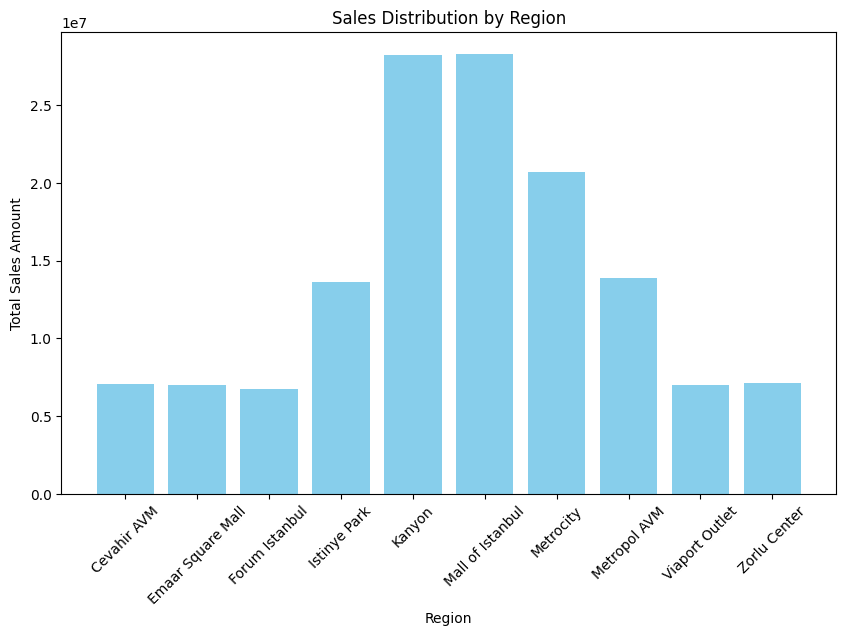

In [ ]:
# Task 5: Create bar plot to visualize sales distribution by region
plt.figure(figsize=(10, 6))
plt.bar(sales_by_region['shopping_mall'], sales_by_region['sales'], color='skyblue')
plt.title('Sales Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Task 6: Identify the top-performing regions based on highest sales
top_regions = sales_by_region.sort_values(by='sales', ascending=False)
print("\nTop-performing regions:")
print(top_regions)


Top-performing regions:
       shopping_mall        sales
5   Mall of Istanbul  28281988.21
4             Kanyon  28191240.79
6          Metrocity  20697260.31
7       Metropol AVM  13896314.46
3       Istinye Park  13619165.62
9       Zorlu Center   7141451.25
0        Cevahir AVM   7034401.09
1  Emaar Square Mall   7004074.39
8     Viaport Outlet   6989645.70
2     Forum Istanbul   6713933.38


In [ ]:
# Task 7: Group sales data by region and product category to calculate total sales
sales_by_region_category = df.groupby(['shopping_mall', 'category'])['sales'].sum().unstack()

print("\nTotal sales by region and product category:")
print(sales_by_region_category)


Total sales by region and product category:
category              Books     Clothing  Cosmetics  Food & Beverage  \
shopping_mall                                                          
Cevahir AVM        24967.20   3165543.92  201510.96         22478.54   
Emaar Square Mall  23467.35   3033208.64  202161.52         23299.65   
Forum Istanbul     25164.15   3143338.00  197444.96         21631.28   
Istinye Park       43268.40   6317284.16  369152.14         48246.75   
Kanyon             93717.90  12651372.80  761846.42         91111.83   
Mall of Istanbul   92051.40  12748898.80  749241.82         95735.15   
Metrocity          67569.00   9597758.72  559440.94         74297.38   
Metropol AVM       47146.80   6398305.76  367769.70         51170.32   
Viaport Outlet     24512.70   3172745.84  193704.24         22577.91   
Zorlu Center       21588.75   3071318.80  189760.22         22551.76   

category                Shoes  Souvenir  Technology       Toys  
shopping_mall            

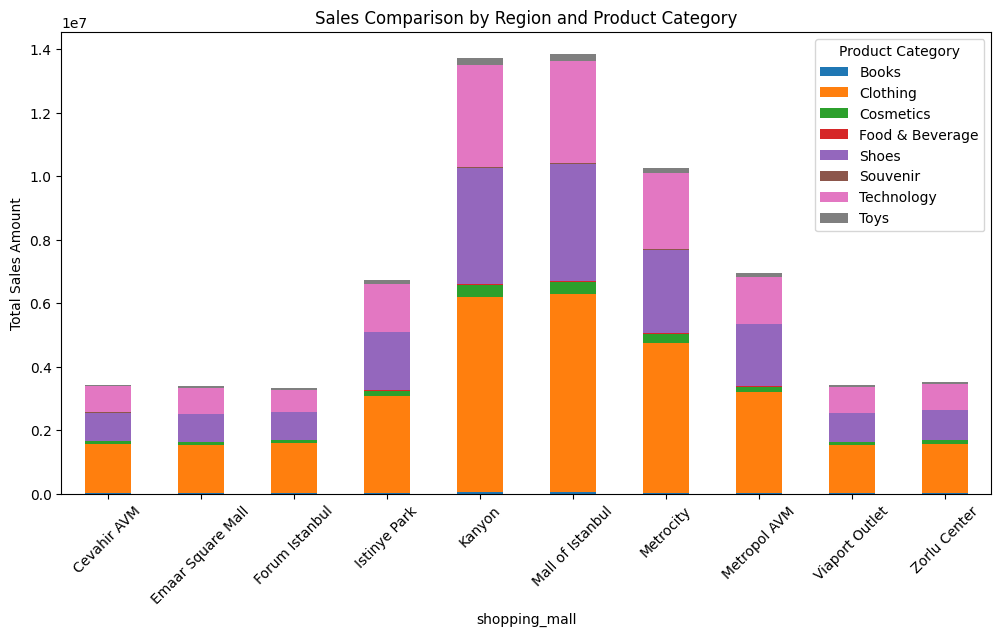

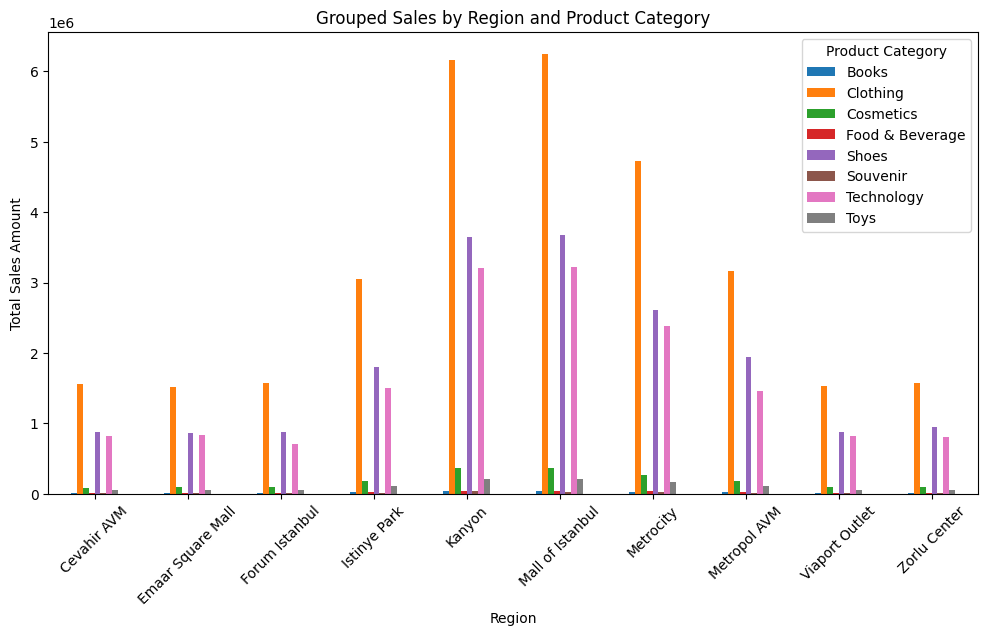

In [ ]:
# Task 8: Create stacked bar plot to compare sales across regions and product categories
sales_by_region_category.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Sales Comparison by Region and Product Category')
plt.xlabel('shopping_mall')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.legend(title='Product Category')
plt.show()

# Alternatively, create grouped bar plot for the same comparison
sales_by_region_category.plot(kind='bar', stacked=False, figsize=(12, 6))
plt.title('Grouped Sales by Region and Product Category')
plt.xlabel('shopping_mall')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.legend(title='Product Category')
plt.show()